In [16]:
# preprocessing step 1: convert the h264 to mp4

import glob
import os
import subprocess

videos = "../videos/videos_tags/videos_tags_mp4"

if not os.path.exists(videos):
    os.mkdir(videos)

# Title

In [53]:
counter = 0
for video in glob.glob(os.path.join('../videos/videos_tags/', '*.h264')):  
    path = os.path.split(video)   
    video_mp4 = os.path.join(path[0],"videos_tags_mp4",os.path.splitext(path[1])[0] + '.mp4')

    print(video_mp4)
    subprocess.call(['ffmpeg', '-framerate', '3', '-fflags', '+genpts', '-i', video, '-c', 'copy', video_mp4])
    if counter == 100:
        break
    counter += 1

../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-13.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-33.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-01-08-54.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-20-55.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-16.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-37.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-21-58.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-22-19.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-22-40.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-01.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-22.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-23-43.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-24-04.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-24-25.mp4
../videos/videos_tags/videos_tags_mp4/e00_2018-08-19-02-25-33.mp4
../videos/

In [3]:
%env KERAS_BACKEND=theano
%env THEANO_FLAGS=floatX=float32,device=cpu

env: KERAS_BACKEND=theano
env: THEANO_FLAGS=floatX=float32,device=cpu


In [4]:
%load_ext autoreload
%autoreload 1
%aimport bb_behavior
%aimport bb_behavior.plot
%aimport bb_behavior.tracking
%aimport bb_behavior.tracking.pipeline

import bb_behavior
import bb_behavior.plot
import bb_behavior.tracking
import bb_behavior.tracking.pipeline

Using Theano backend.


## Run

In [5]:
default_pipeline = None

In [68]:
from bb_behavior.tracking.pipeline import get_default_pipeline
default_pipeline = get_default_pipeline(localizer_threshold="0.65")

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [46]:
from pipeline import Pipeline
from pipeline.objects import Filename, Positions, Saliencies, IDs
from pipeline.pipeline import get_auto_config

default_pipeline = Pipeline([Filename],  # inputs
                    [Positions, Saliencies, IDs],  # outputs
                    **get_auto_config())

In [7]:
from tqdm import tqdm_notebook # progress bar

import math
import numpy as np
from bb_tracking.data.constants import DETKEY
#from bb_tracking.tracking import score_id_sim_v
from bb_tracking.tracking import distance_orientations_v, distance_positions_v

from bb_behavior.tracking.pipeline import detect_markers_in_video
from bb_behavior.tracking.pipeline import track_detections_dataframe
from bb_behavior.tracking.pipeline import display_tracking_results
tqdm_notebook

<function tqdm.tqdm_notebook>

In [108]:

configs = [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1,
            start_time=None,
            fps=3.0,
            cam_id=0)
]
configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=45,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1,
            start_time=None,
            fps=3.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=55,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1,
            start_time=None,
            fps=3.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=1.2,
            start_time=None,
            fps=3.0,
            cam_id=0)
]

configs += [
        dict(path="../videos/videos_tags/e00_2018-08-19-01-08-13.h264",
             tag_pixel_diameter=50,
             n_frames=None,
             confidence_filter_detections=0.0,
             confidence_filter_tracks=0.0,
             coordinate_scale=0.85,
            start_time=None,
            fps=3.0,
            cam_id=0)
]

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


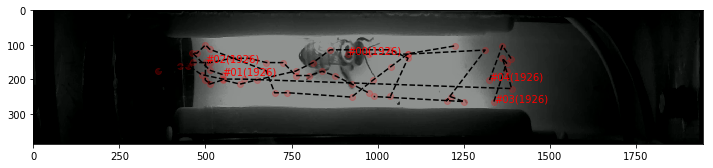

Detection/track statistics:


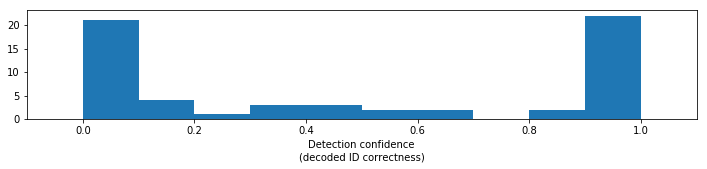

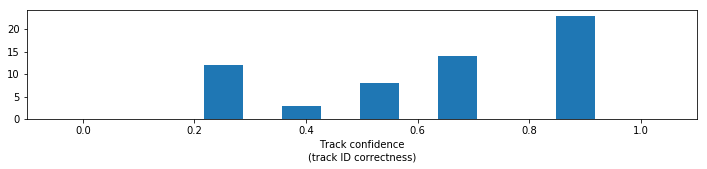

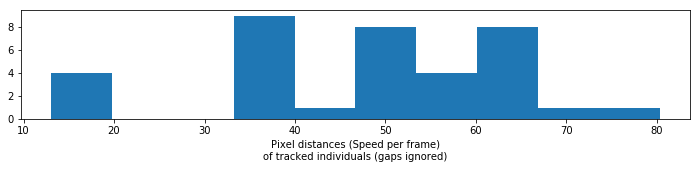

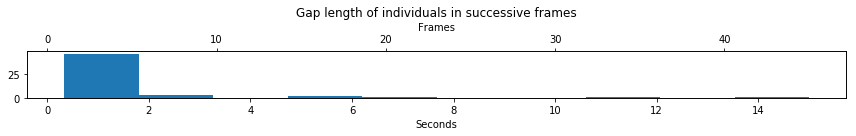

Individual statistics:


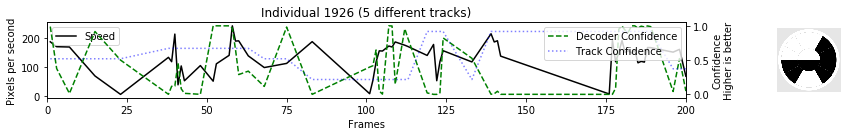

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 1, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This

Found 60 detections belonging to 4 unique tracks and 1 individuals.


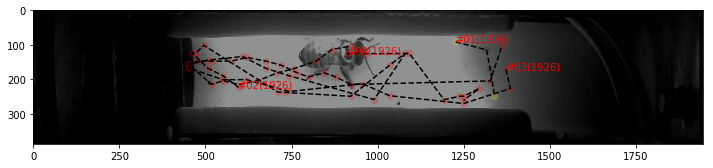

Detection/track statistics:


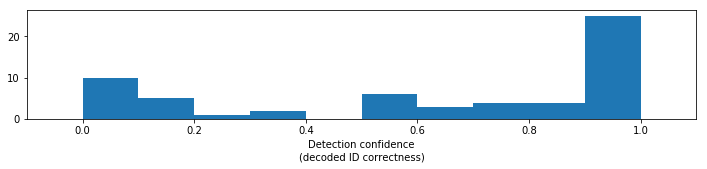

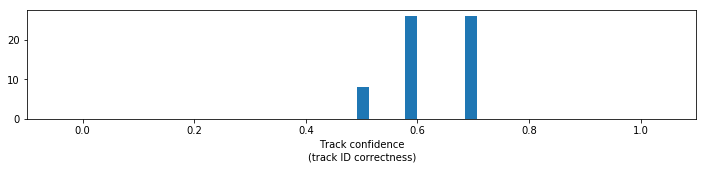

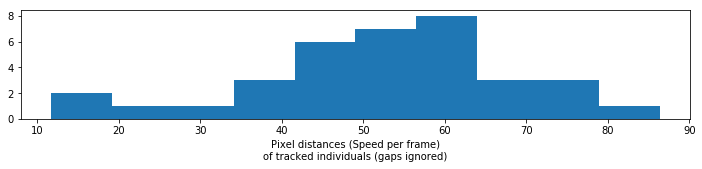

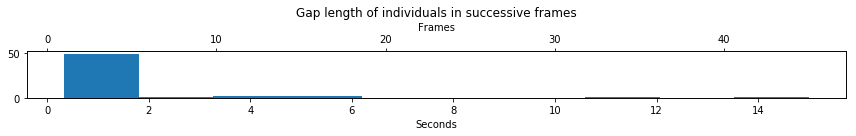

Individual statistics:


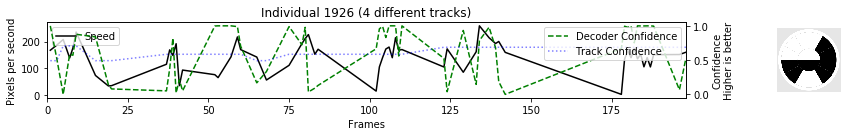

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 45, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 1, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This

Found 47 detections belonging to 8 unique tracks and 4 individuals.


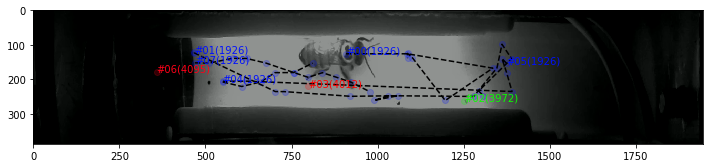

Detection/track statistics:


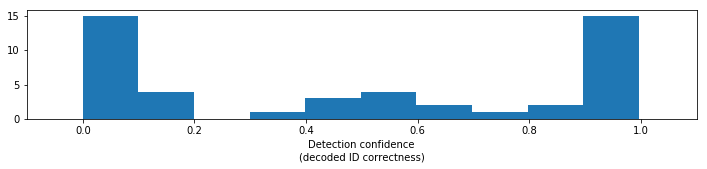

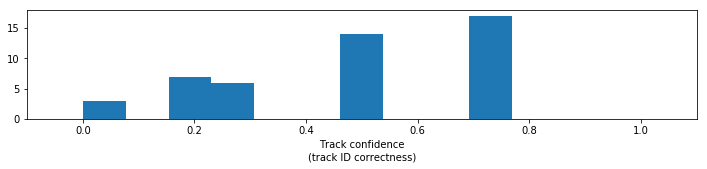

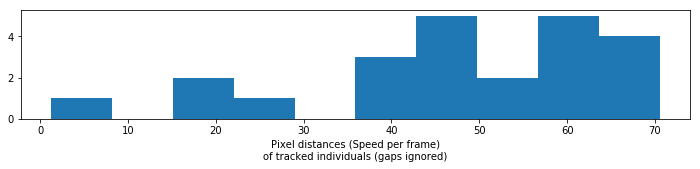

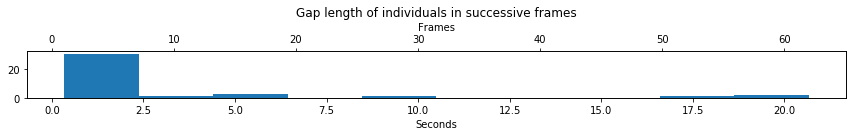

Individual statistics:


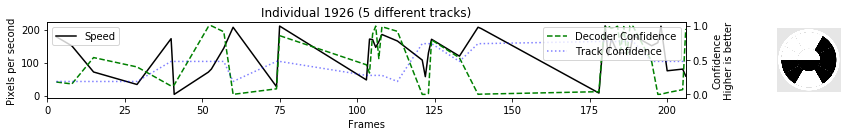

Individual 3972 in track 2 has only 1 detection(s). Skipping.
Individual 4012 in track 3 has only 1 detection(s). Skipping.
Individual 4095 in track 6 has only 1 detection(s). Skipping.
{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 55, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 1, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 7 unique tracks and 2 individuals.


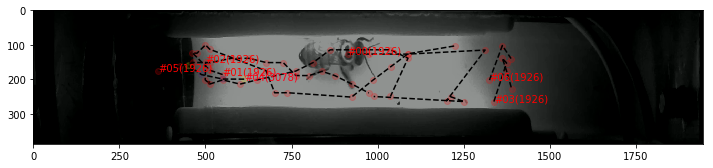

Detection/track statistics:


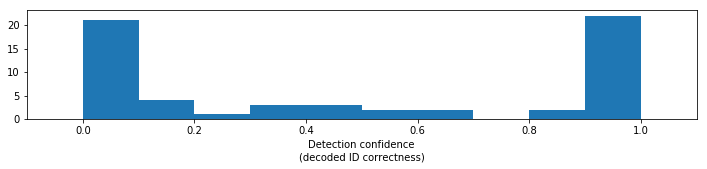

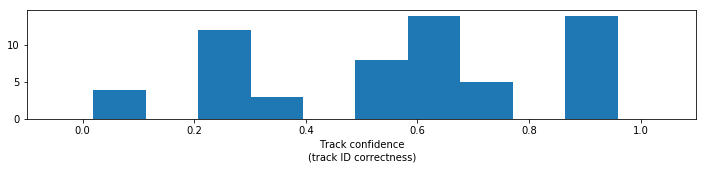

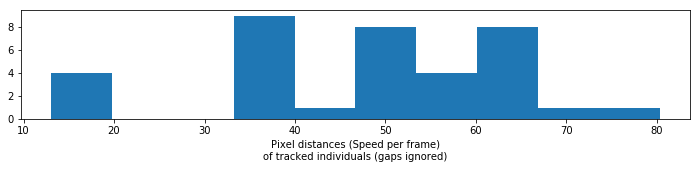

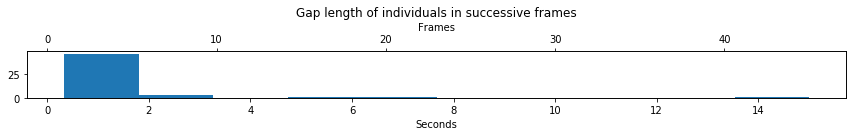

Individual statistics:


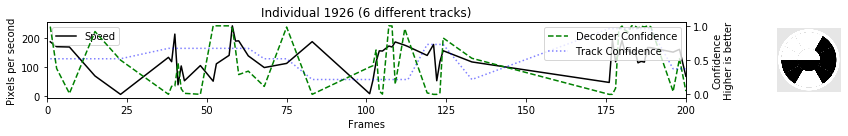

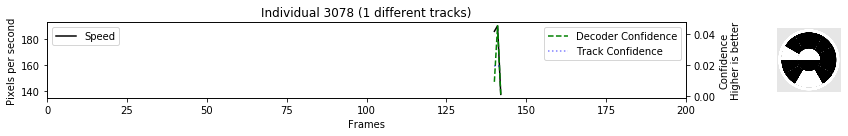

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 1.2, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


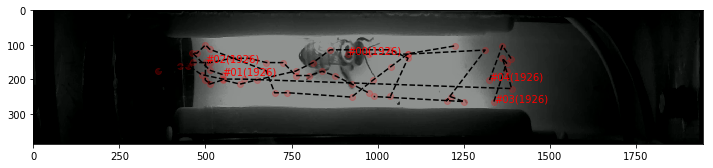

Detection/track statistics:


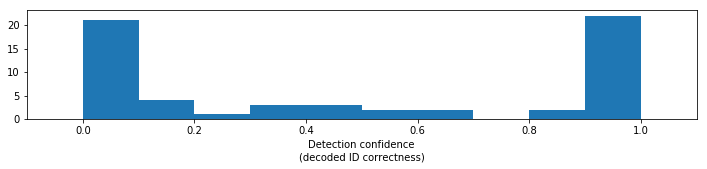

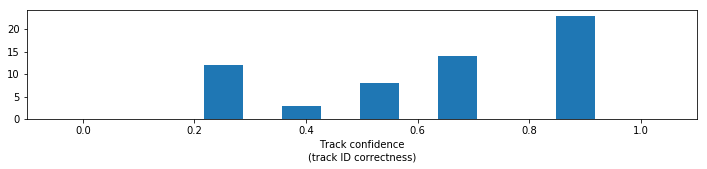

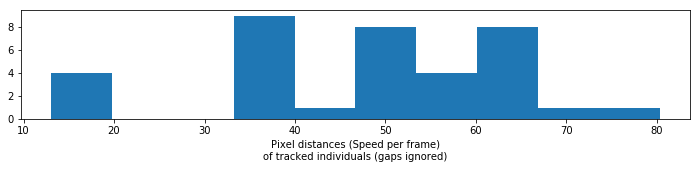

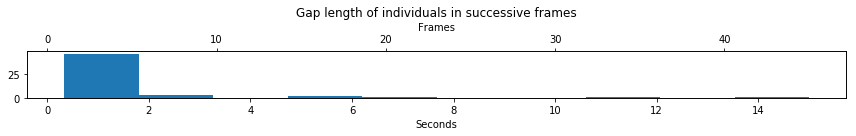

Individual statistics:


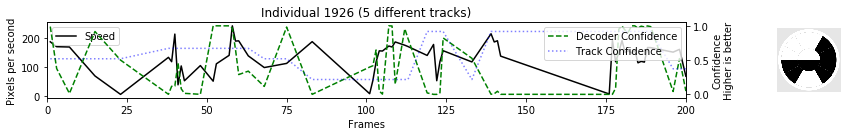

{'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264', 'tag_pixel_diameter': 50, 'n_frames': None, 'confidence_filter_detections': 0.0, 'confidence_filter_tracks': 0.0, 'coordinate_scale': 0.85, 'start_time': None, 'fps': 3.0, 'cam_id': 0}


In [109]:
num_processed_videos = 0
video_data = dict()
frame_info = None
detections = None


for config in tqdm_notebook(configs):
    start_time, path = config["start_time"], config["path"]
    cam_id = config["cam_id"]#int(path[cam_id_idx])
    #pipelines.reset(4)
    
    try:
        num_processed_videos += 1

        frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
        tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
        display_tracking_results(config["path"], frame_info, detections, tracks)
        video_data[path] = (frame_info, detections, tracks)
        print(config)
    
    except Exception as err:
        print(err)
        raise
    # only first vid
    #break
    

In [92]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f12849089960661013052d0c0,0.700627,"[0.96027535, 4.7177076e-05, 0.00037240982, 7.5...",910.506082,121.587349,0,-0.029027,0.000000,0,9.160826e-01,0,0.892563,1926
0,f9289164563434890506d0c0,0.686649,"[0.9996481, 2.1457672e-06, 7.2419643e-06, 1.18...",970.124762,121.767712,0,-0.044515,0.333333,1,9.989123e-01,0,0.892563,1926
0,f16061279572503072771d0c0,0.680781,"[0.99905556, 0.00023522973, 6.4104795e-05, 3.9...",1090.938493,121.426186,0,-0.011999,1.000000,3,2.110534e-01,0,0.892563,1926
0,f16606682454472476713d0c0,0.692171,"[0.9993874, 0.010825455, 5.751848e-06, 0.00014...",1329.894641,172.964832,0,0.437571,2.666667,8,9.284061e-01,0,0.892563,1926
0,f12493552471242744872d0c0,0.669110,"[0.9966524, 0.00018388033, 4.172325e-06, 1.430...",1200.403606,260.167532,0,2.178293,5.000000,15,7.996434e-01,1,0.513368,1926
0,f14806282264693482614d0c0,0.689799,"[0.9974721, 0.9327864, 0.028594613, 0.00432869...",1239.142182,251.591344,0,0.986520,6.333333,19,3.486560e-02,1,0.513368,1926
0,f14460733987296203383d0c0,0.669915,"[0.82905775, 0.9904026, 0.34545696, 0.03239047...",1190.739381,270.983293,0,2.028607,8.000000,24,2.237685e-02,1,0.513368,1926
0,f14091172390072638046d0c0,0.654633,"[0.9895922, 0.05773422, 0.2691022, 0.011710525...",649.520937,238.568418,0,3.136450,12.000000,36,1.484790e-01,2,0.522406,1926
0,f13441160447306591608d0c0,0.673240,"[0.47892937, 0.0075928867, 0.035547465, 0.0398...",600.146051,218.518896,0,-3.041735,12.333333,37,2.570790e-02,2,0.522406,1926
0,f16538320874824552921d0c0,0.698617,"[0.9348007, 0.004483521, 0.016982824, 0.001372...",549.805994,188.698349,0,-2.877229,12.666667,38,7.593269e-01,2,0.522406,1926


Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


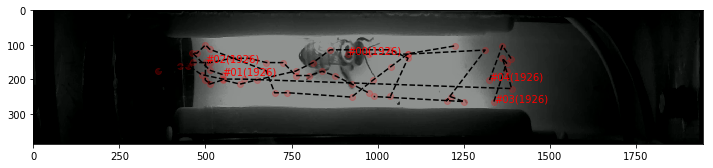

Detection/track statistics:


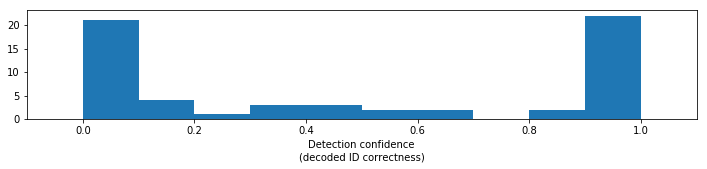

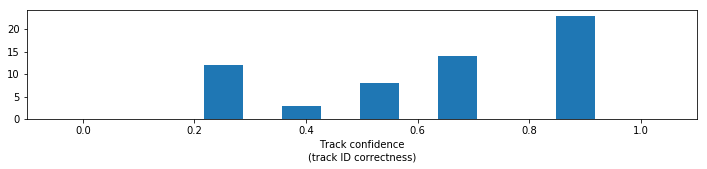

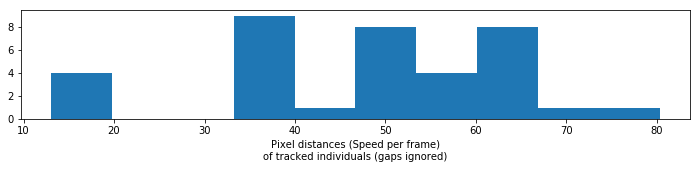

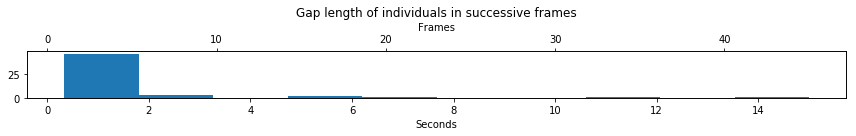

Individual statistics:


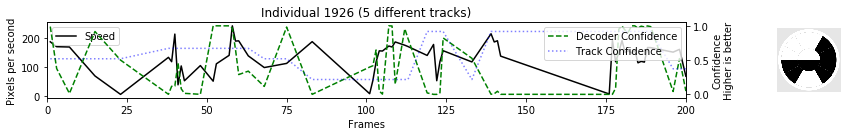

In [103]:
config = configs[0]

frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
video_data[path] = (frame_info, detections, tracks)
display_tracking_results(config["path"], frame_info, detections, tracks)

In [105]:
config

{'cam_id': 0,
 'confidence_filter_detections': 0.0,
 'confidence_filter_tracks': 0.0,
 'coordinate_scale': 1,
 'fps': 3.0,
 'n_frames': None,
 'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 'start_time': None,
 'tag_pixel_diameter': 50}

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 60 detections belonging to 5 unique tracks and 1 individuals.


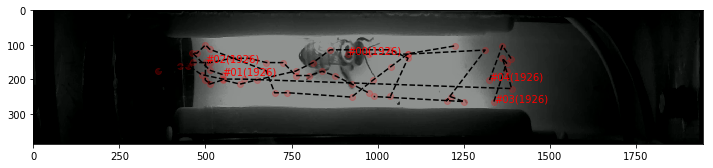

Detection/track statistics:


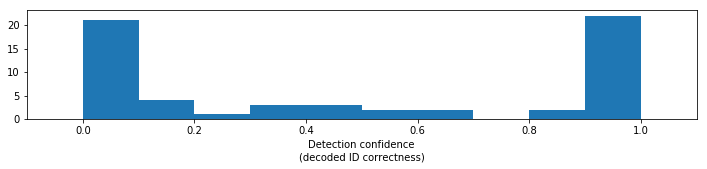

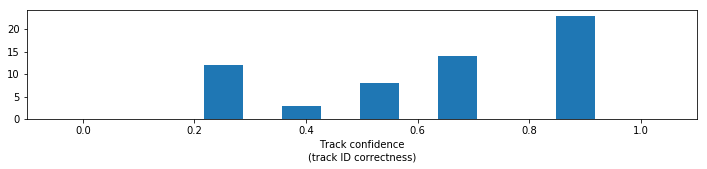

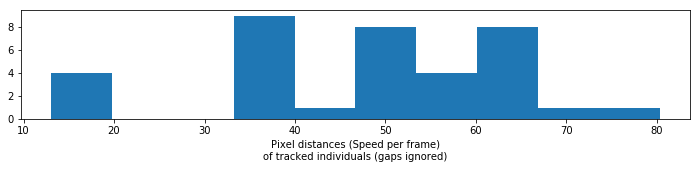

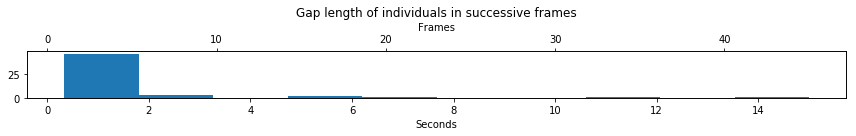

Individual statistics:


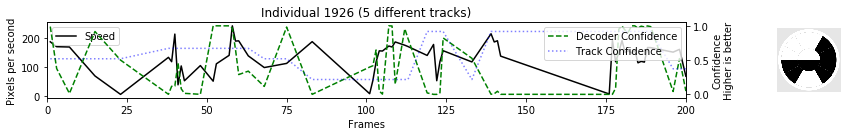

{'cam_id': 0,
 'confidence_filter_detections': 0.0,
 'confidence_filter_tracks': 0.0,
 'coordinate_scale': 0.85,
 'fps': 3.0,
 'n_frames': None,
 'path': '../videos/videos_tags/e00_2018-08-19-01-08-13.h264',
 'start_time': None,
 'tag_pixel_diameter': 50}

In [102]:
config = configs[4]

frame_info, detections = detect_markers_in_video(path,
                                                      pipeline=default_pipeline,#pipeline=pipelines(),
                                                     tag_pixel_diameter=config["tag_pixel_diameter"],
                                                      n_frames=config["n_frames"],
                                                      fps=config["fps"],
                                                     progress="tqdm_notebook"
                                                             )
tracks = track_detections_dataframe(detections,
                                            tracker="../tracker.det_score_fun.frag_score_fun.dill",
                                            confidence_filter_detections=config["confidence_filter_detections"],
                                           confidence_filter_tracks=config["confidence_filter_tracks"],
                                            coordinate_scale=config["coordinate_scale"]
                                           )
        
video_data[path] = (frame_info, detections, tracks)
display_tracking_results(config["path"], frame_info, detections, tracks)
config

In [110]:
tracks

,id,localizerSaliency,beeID,xpos,ypos,camID,zrotation,timestamp,frameIdx,confidence,track_id,track_confidence,bee_id
0,f10908569516138566952d0c0,0.688078,"[0.99784017, 0.0001437068, 0.0003311038, 1.132...",912.430529,126.998674,0,0.089175,0.000000,0,9.942605e-01,0,0.519272,1926
0,f16680002725693325236d0c0,0.674689,"[0.9999927, 4.169345e-05, 1.1622906e-06, 8.046...",974.536364,126.958956,0,-0.139244,0.333333,1,9.885683e-01,0,0.519272,1926
0,f17869457354731890685d0c0,0.687777,"[0.99854314, 0.21899119, 0.00043278933, 0.0002...",1087.552650,127.151928,0,0.046847,1.000000,3,3.766603e-01,0,0.519272,1926
0,f16781581644097826344d0c0,0.667169,"[0.5131483, 0.01077801, 0.0011860728, 0.000248...",1311.874615,115.248051,0,-0.094585,2.333333,7,1.358892e-02,0,0.519272,1926
0,f10357713406767676976d0c0,0.660274,"[0.9984825, 3.299117e-05, 2.9087067e-05, 4.231...",1199.793835,262.587893,0,2.071011,5.000000,15,9.168164e-01,0,0.519272,1926
0,f16515593981739389874d0c0,0.655578,"[0.99990785, 5.8054924e-05, 4.172325e-07, 3.87...",1212.585613,251.046106,0,1.911840,7.666667,23,4.997132e-01,0,0.519272,1926
0,f12195990658272170785d0c0,0.669532,"[0.8353583, 0.026736587, 0.0665628, 0.01522532...",549.873152,186.494644,0,-3.001573,12.666667,38,1.168070e-03,1,0.671165,1926
0,f9343897783269065032d0c0,0.670466,"[0.99635774, 0.03613785, 0.023948759, 0.001328...",512.545910,173.826654,0,-2.718555,13.000000,39,1.179061e-01,1,0.671165,1926
0,f11867899148229097634d0c0,0.704565,"[0.9933269, 0.6648356, 0.006554663, 0.00013861...",462.318939,123.780151,0,-2.803945,13.333333,40,1.210965e-01,1,0.671165,1926
0,f18153546298569845078d0c0,0.694593,"[0.9978933, 0.007896394, 0.0006965697, 0.00015...",475.328827,124.561377,0,-2.564812,13.666667,41,4.593289e-01,1,0.671165,1926


In [ ]:
import bb_utils

In [ ]:
def to_bee_id(bits):
    return bb_utils.ids.BeesbookID.from_bb_binary(bits).as_ferwar()
bee_ids = list(map(to_bee_id, detections.beeID.values))
detections["bee_id"] = bee_ids

In [ ]:
with open("/home/david/Downloads/ants/detections.csv", "w") as f:
    detections.to_csv(f)
with open("/home/david/Downloads/ants/tracks.csv", "w") as f:
    tracks.to_csv(f)